In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('data/diabetes.csv')
print(data.shape)
data.head()

# Dataset from: https://www.kaggle.com/code/towfeeqf/diabetes-prediction-ml/data

(768, 9)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1

In [3]:
# Check for missing data

data.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
training_accuracy = []
test_accuracy = []
neighbors = range(1, 16)

for n_neighbors in neighbors:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    clf.fit(X_train, y_train)
    training_accuracy.append(round(clf.score(X_train, y_train), 3))
    test_accuracy.append(round(clf.score(X_test, y_test), 3))
    
print(training_accuracy)
print(test_accuracy)

[1.0, 0.835, 0.858, 0.799, 0.786, 0.771, 0.78, 0.78, 0.788, 0.773, 0.778, 0.767, 0.785, 0.774, 0.783]
[0.62, 0.719, 0.698, 0.766, 0.755, 0.76, 0.76, 0.76, 0.771, 0.781, 0.766, 0.776, 0.781, 0.766, 0.766]


In [7]:
print('Max accuracy:', max(test_accuracy), ',', 'n_neighbors:', test_accuracy.index(max(test_accuracy)) + 1)

Max accuracy: 0.781 , n_neighbors: 10


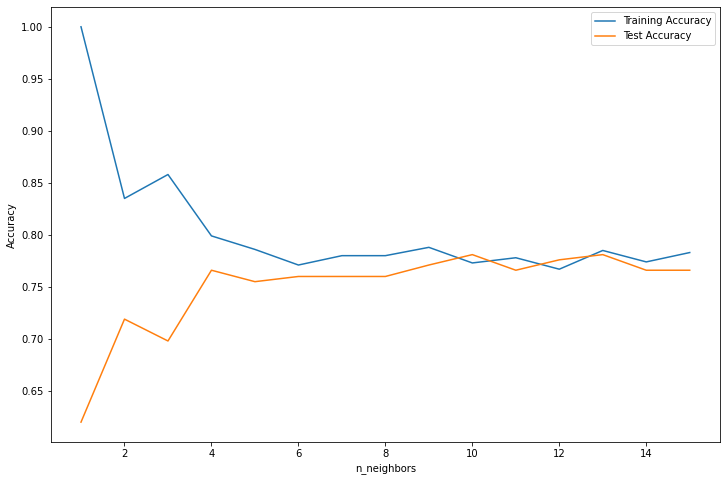

In [8]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, training_accuracy, label='Training Accuracy')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.show()

# EDA - Feature Analysis 

In [9]:
features_df = X
features_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  
0     0.627   50  
1     0.351   31  
2     0.672   32  
3     0.167   21  
4     2.288   33

In [10]:
round(features_df.describe(), 3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  \
count      768.000  768.000        768.000        768.000  768.000  768.000   
mean         3.845  120.895         69.105         20.536   79.799   31.993   
std          3.370   31.973         19.356         15.952  115.244    7.884   
min          0.000    0.000          0.000          0.000    0.000    0.000   
25%          1.000   99.000         62.000          0.000    0.000   27.300   
50%          3.000  117.000         72.000         23.000   30.500   32.000   
75%          6.000  140.250         80.000         32.000  127.250   36.600   
max         17.000  199.000        122.000         99.000  846.000   67.100   

       Pedigree      Age  
count   768.000  768.000  
mean      0.472   33.241  
std       0.331   11.760  
min       0.078   21.000  
25%       0.244   24.000  
50%       0.372   29.000  
75%       0.626   41.000  
max       2.420   81.000

<AxesSubplot:>

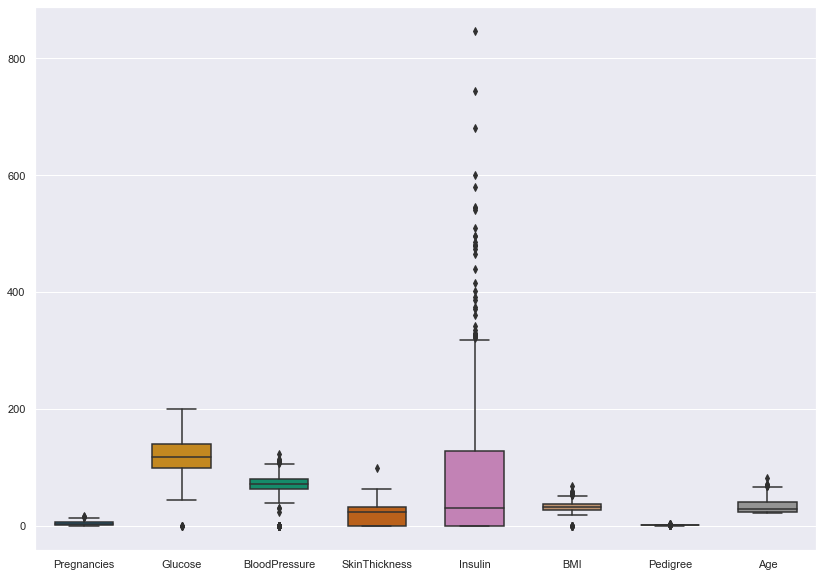

In [11]:
sns.set(rc={'figure.figsize': (14, 10)})
sns.boxplot(data=features_df, width=0.6, palette="colorblind")

In [12]:
# Counting zeros. The mean and median are already shown in previous cell

for col in features_df.columns[1:-2]:
    print(col, '--', 'Zeros:', (features_df[col] == 0).sum(), ',', 'Mean:', round(features_df[col].mean(), 3), \
          ',', 'Median:', features_df[col].median())

Glucose -- Zeros: 5 , Mean: 120.895 , Median: 117.0
BloodPressure -- Zeros: 35 , Mean: 69.105 , Median: 72.0
SkinThickness -- Zeros: 227 , Mean: 20.536 , Median: 23.0
Insulin -- Zeros: 374 , Mean: 79.799 , Median: 30.5
BMI -- Zeros: 11 , Mean: 31.993 , Median: 32.0


### Why are there '0' in Glucose, BloodPressure, SkinThickness, Insulin, BMI?

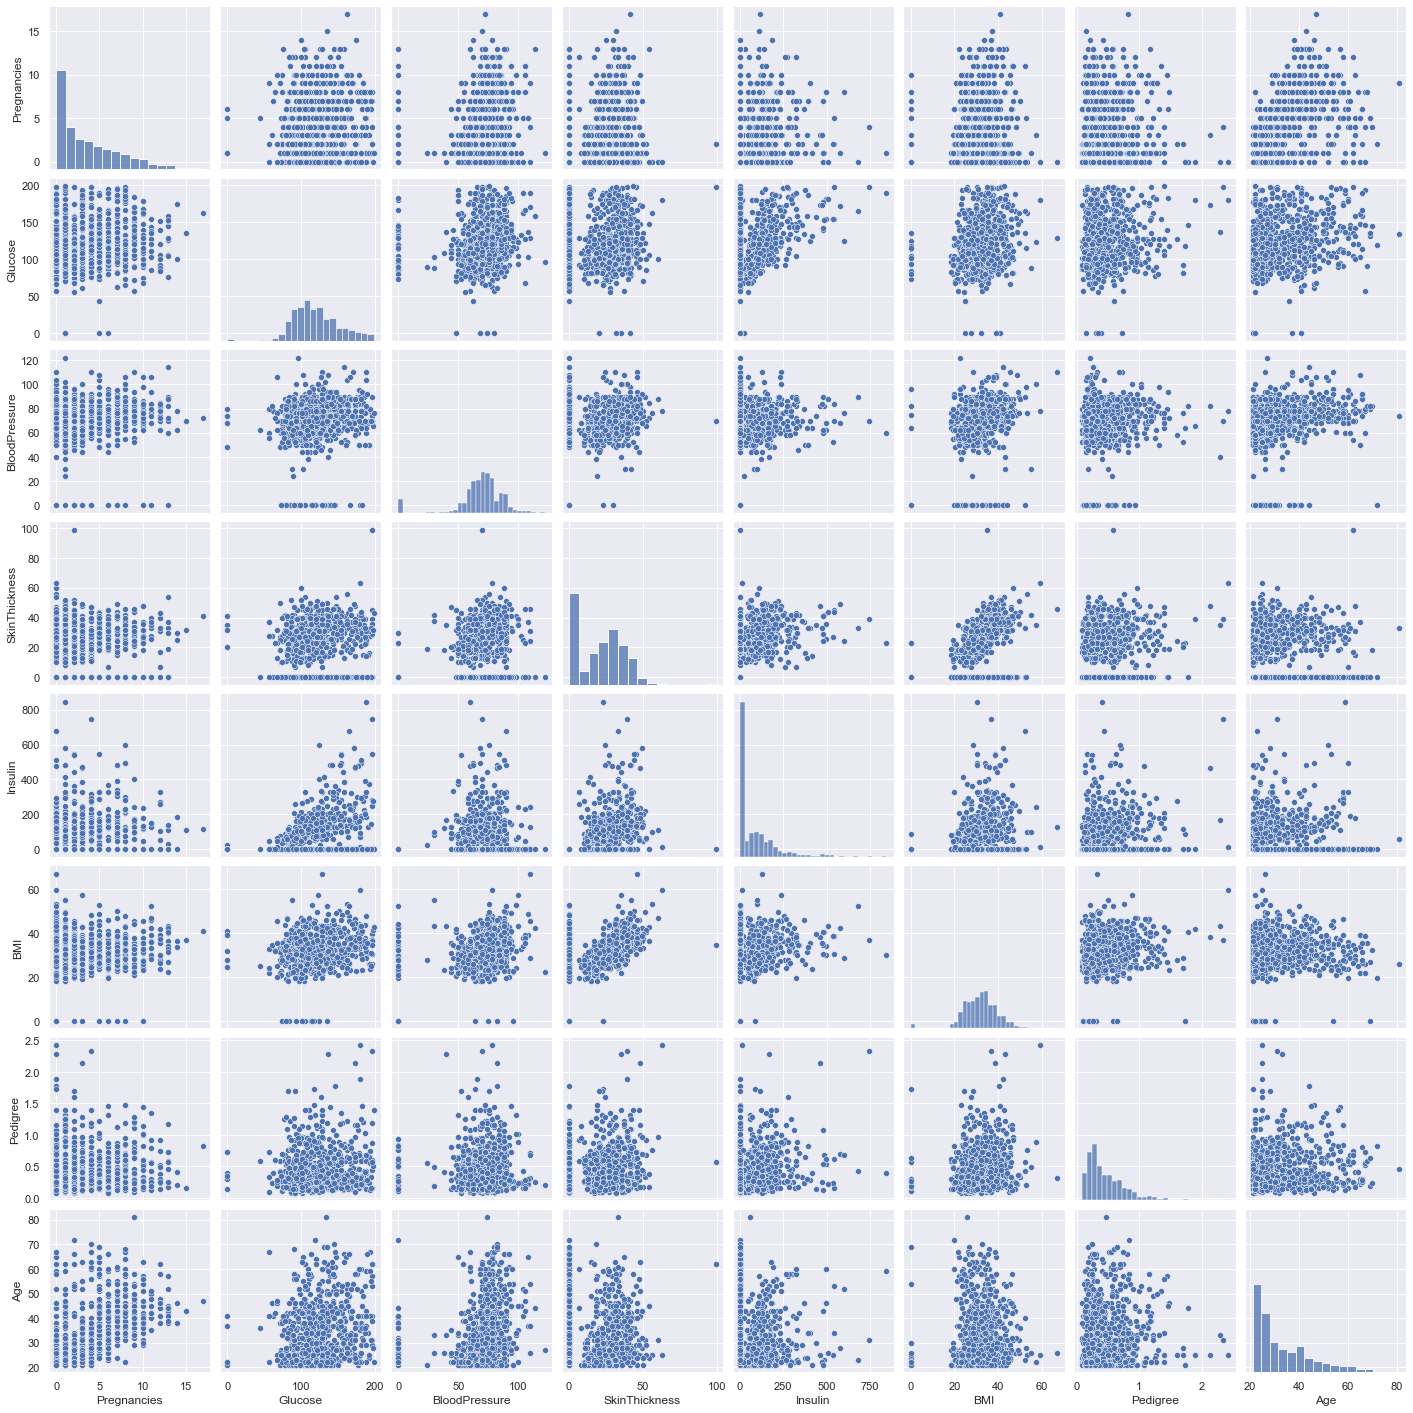

In [13]:
sns.pairplot(features_df)

### Impute 0

In [14]:
features_imp = features_df.copy()

In [15]:
for col in features_imp.columns[1:-2]:
    print(col, '--', 'Zeros:', (features_imp[col] == 0).sum(), ',', 'Mean:', round(features_imp[col].mean(), 3), \
          ',', 'Median:', features_imp[col].median())

Glucose -- Zeros: 5 , Mean: 120.895 , Median: 117.0
BloodPressure -- Zeros: 35 , Mean: 69.105 , Median: 72.0
SkinThickness -- Zeros: 227 , Mean: 20.536 , Median: 23.0
Insulin -- Zeros: 374 , Mean: 79.799 , Median: 30.5
BMI -- Zeros: 11 , Mean: 31.993 , Median: 32.0


In [16]:
# Impute with mean of each column.

for col in features_imp.columns[1:-2]:
    features_imp[col] = features_imp[col].map(lambda x: features_imp[col].mean() if x == 0 else x)

In [17]:
for col in features_imp.columns[1:-2]:
    print(col, '--', 'Zeros:', (features_imp[col] == 0).sum(), ',', 'Mean:', round(features_imp[col].mean(), 3), \
          ',', 'Median:', features_imp[col].median())

Glucose -- Zeros: 0 , Mean: 121.682 , Median: 117.0
BloodPressure -- Zeros: 0 , Mean: 72.255 , Median: 72.0
SkinThickness -- Zeros: 0 , Mean: 26.606 , Median: 23.0
Insulin -- Zeros: 0 , Mean: 118.66 , Median: 79.79947916666667
BMI -- Zeros: 0 , Mean: 32.451 , Median: 32.0


In [18]:
features_imp.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI    Pedigree         Age  
count  768.000000  768.000000  768.000000  
mean    32.450805    0.471876   33.240885  
std      6.875374    0.331329   11.760232  
min     18.200000    0.078000   21.000000  
25%     27.500000    0.243750   24.000000  
50%     32.000000    0.372500   29.000000  
75%     36.600000    0.626250   41.000000  
max     67.100000    2.420000   81.000000

<AxesSubplot:>

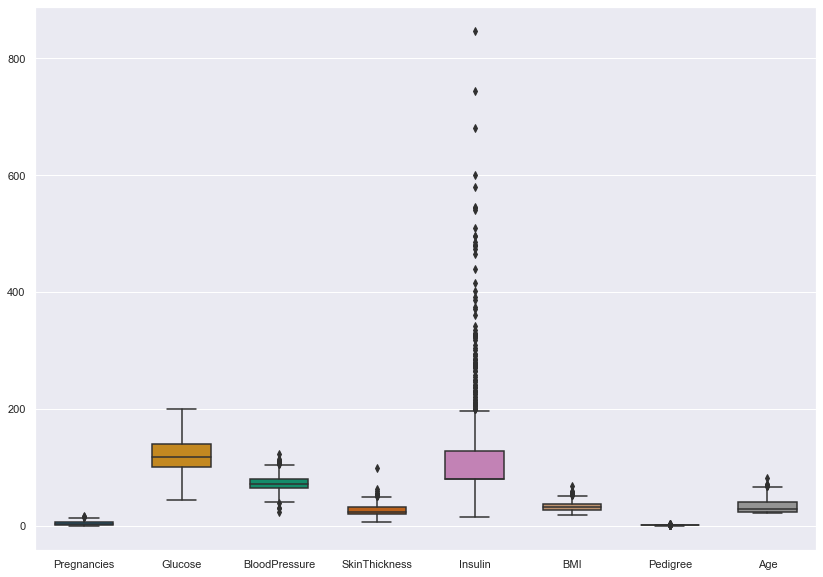

In [19]:
sns.set(rc={'figure.figsize': (14, 10)})
sns.boxplot(data=features_imp, width=0.6, palette="colorblind")

There was an effect on Insulin by imputing zeros

In [20]:
features_imp.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   Pedigree  Age  
0     0.627   50  
1     0.351   31  
2     0.672   32  
3     0.167   21  
4     2.288   33

In [21]:
# Check for NaN

features_imp.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
dtype: int64

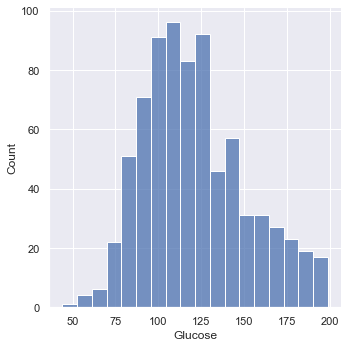

In [22]:
# Glucose distribution

sns.displot(features_imp['Glucose'])

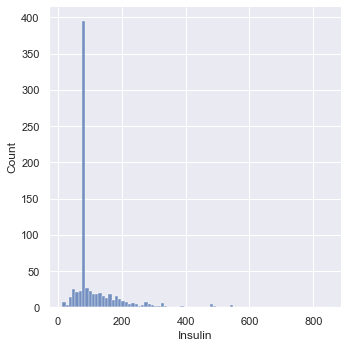

In [23]:
# Insulin distribution

sns.displot(features_imp['Insulin'])

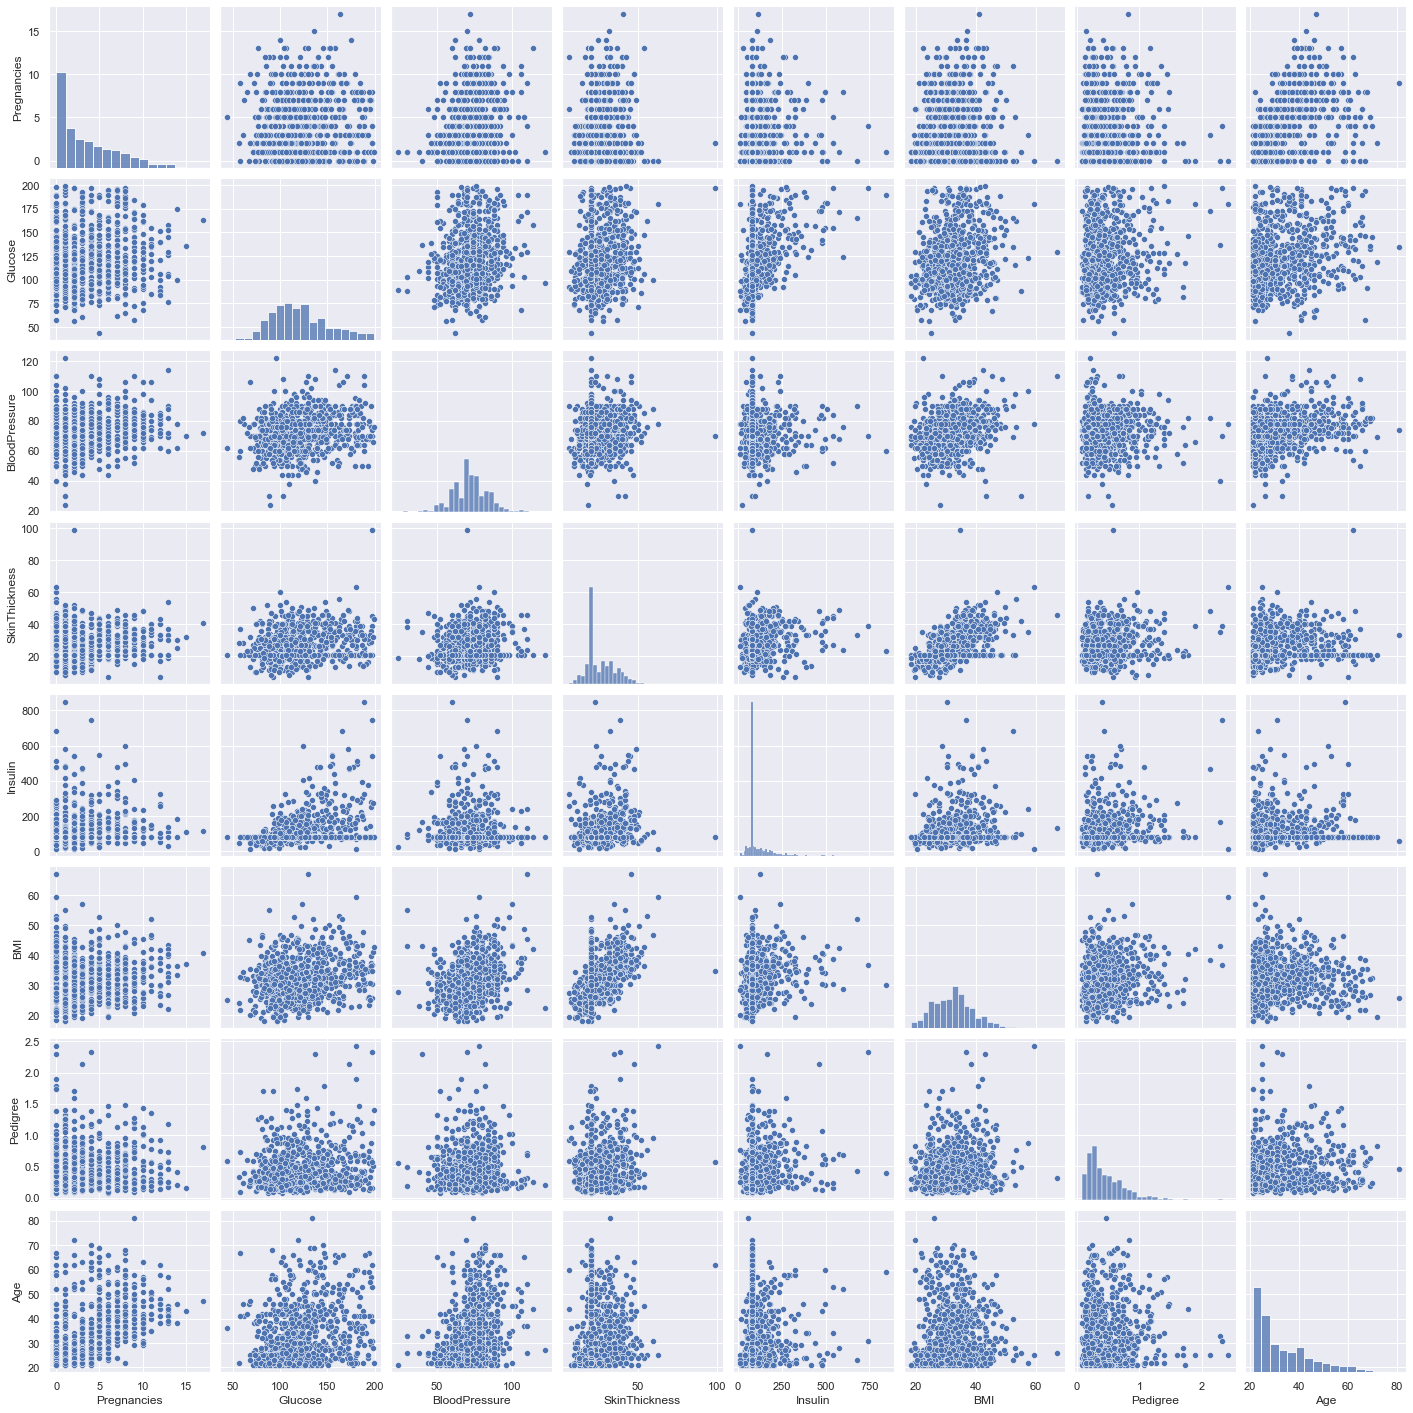

In [24]:
sns.pairplot(features_imp)

### Min Max feature scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features_norm = pd.DataFrame(scaler.fit_transform(features_imp), columns=features_imp.columns)

features_norm.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.079086  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.079086  0.171779   
2     0.470588  0.896774       0.408163       0.147135  0.079086  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   Pedigree       Age  
0  0.234415  0.483333  
1  0.116567  0.166667  
2  0.253629  0.183333  
3  0.038002  0.000000  
4  0.943638  0.200000

In [26]:
features_norm.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.226180    0.501172       0.492396       0.213114    0.125793   
std       0.198210    0.196361       0.123632       0.104687    0.111875   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.058824    0.359677       0.408163       0.147135    0.079086   
50%       0.176471    0.470968       0.489796       0.173913    0.079086   
75%       0.352941    0.620968       0.571429       0.271739    0.136118   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI    Pedigree         Age  
count  768.000000  768.000000  768.000000  
mean     0.291428    0.168179    0.204015  
std      0.140601    0.141473    0.196004  
min      0.000000    0.000000    0.000000  
25%      0.190184    0.070773    0.050000  
50%      0.282209    0.125747    0.133333  
75%      0.376278    0.234095    0.333333  
max      1.000000    1.000000    1.000000

<AxesSubplot:>

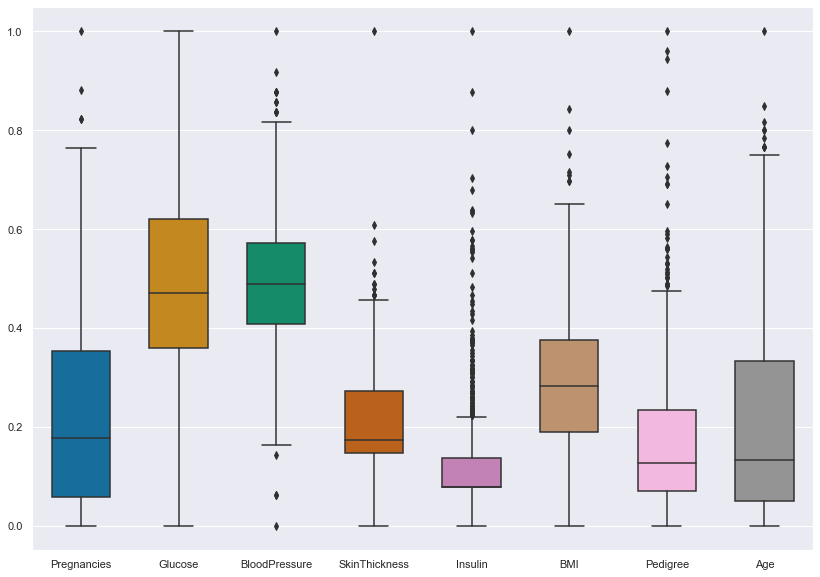

In [27]:
sns.set(rc={'figure.figsize': (14, 10)})
sns.boxplot(data=features_norm, width=0.6, palette="colorblind")

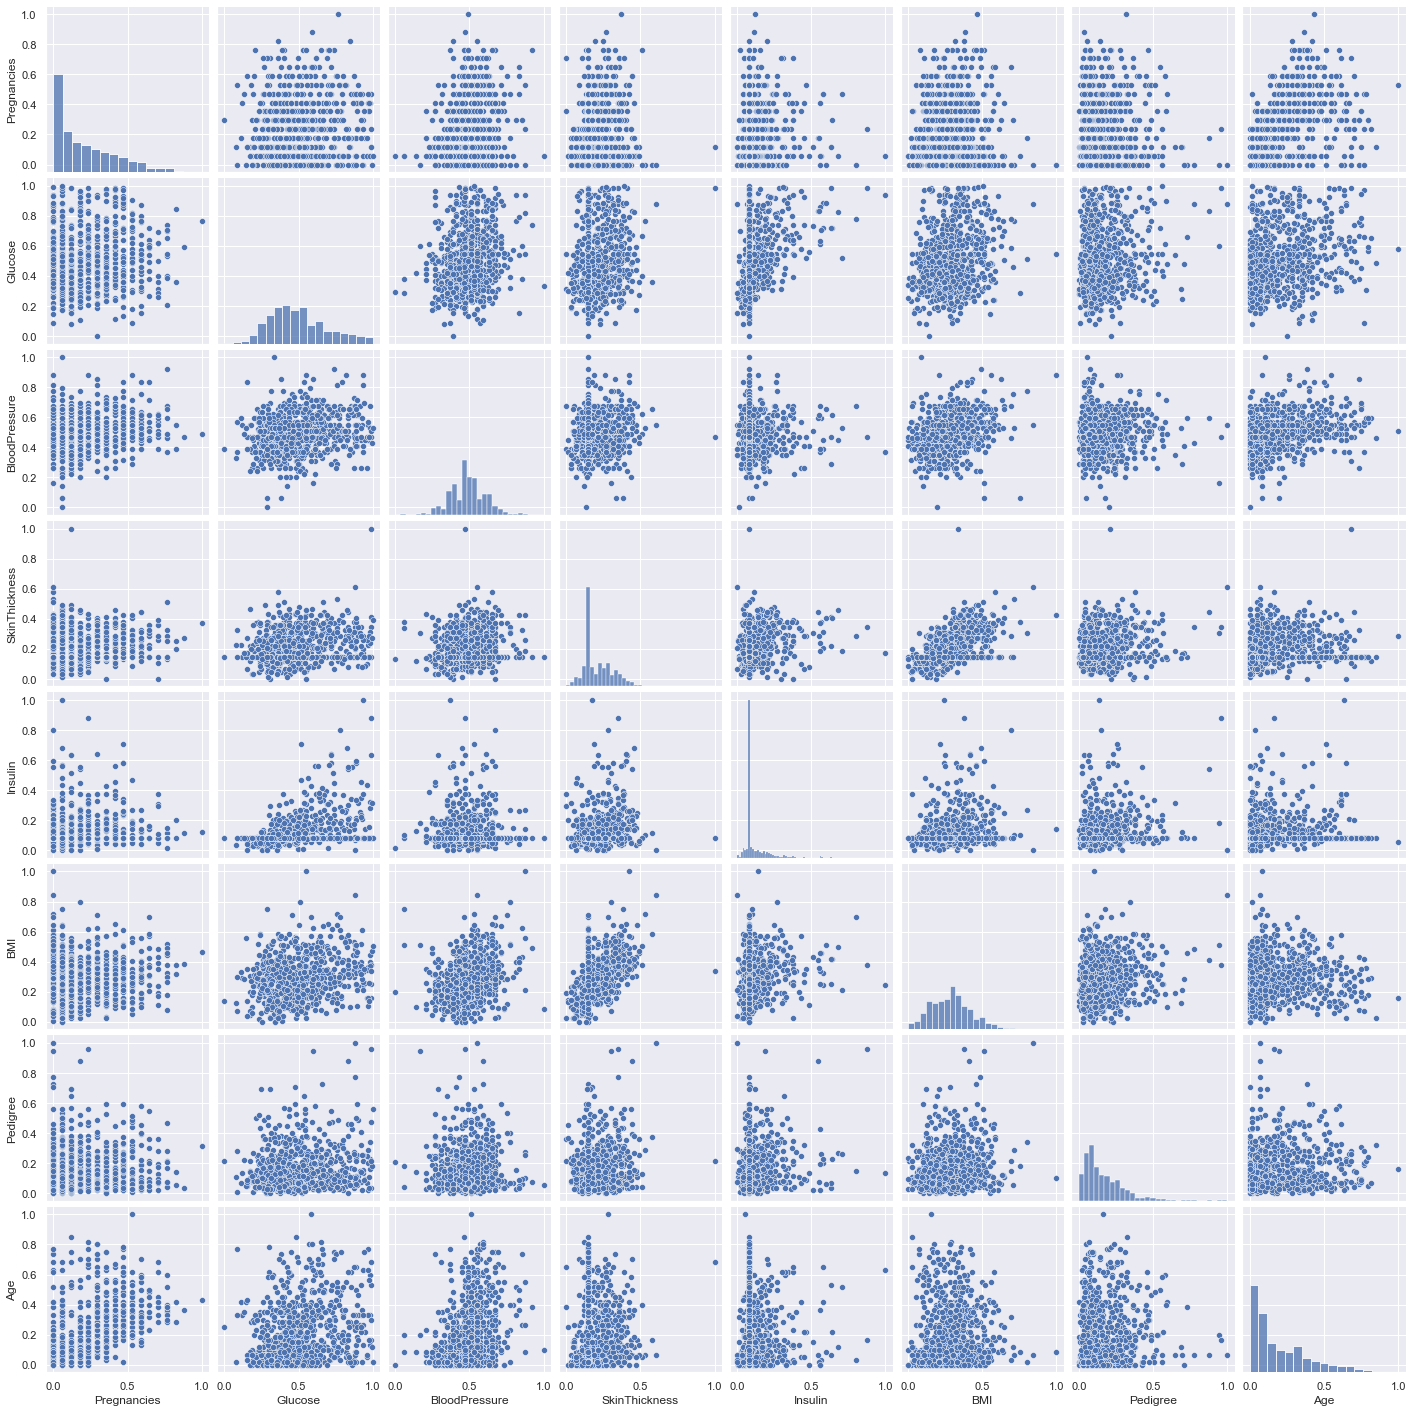

In [28]:
sns.pairplot(features_norm)

In [29]:
features_norm['Outcome'] = y
features_norm.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.079086  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.079086  0.171779   
2     0.470588  0.896774       0.408163       0.147135  0.079086  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   Pedigree       Age  Outcome  
0  0.234415  0.483333        1  
1  0.116567  0.166667        0  
2  0.253629  0.183333        1  
3  0.038002  0.000000        0  
4  0.943638  0.200000        1

# New KNN model on scaled dataframe

In [30]:
X = features_norm.iloc[:, :-1]
y = features_norm.iloc[:, -1]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [32]:
training_accuracy = []
test_accuracy = []
neighbors = range(1, 16)

for n_neighbors in neighbors:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    clf.fit(X_train, y_train)
    training_accuracy.append(round(clf.score(X_train, y_train), 3))
    test_accuracy.append(round(clf.score(X_test, y_test), 3))
    
print(training_accuracy)
print(test_accuracy)

[1.0, 0.833, 0.835, 0.806, 0.818, 0.806, 0.807, 0.785, 0.792, 0.783, 0.773, 0.778, 0.785, 0.781, 0.793]
[0.719, 0.745, 0.745, 0.75, 0.766, 0.786, 0.792, 0.797, 0.802, 0.797, 0.781, 0.771, 0.781, 0.786, 0.771]


## This was the best performance

In [33]:
print('Max accuracy:', max(test_accuracy), ',', 'n_neighbors:', test_accuracy.index(max(test_accuracy)) + 1)

Max accuracy: 0.802 , n_neighbors: 9


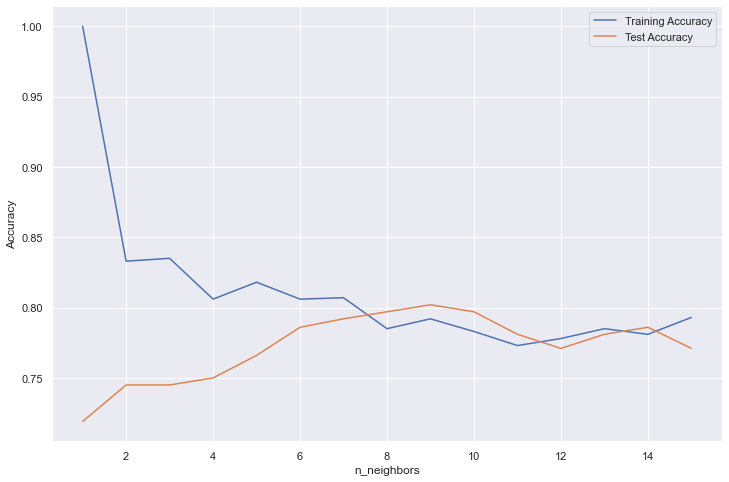

In [34]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, training_accuracy, label='Training Accuracy')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.show()

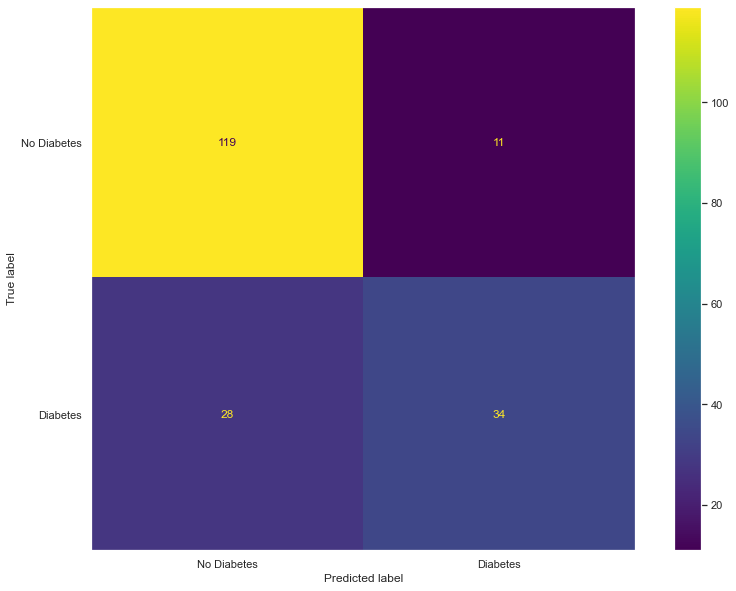

In [69]:
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix


plot_confusion_matrix(clf, X_test, y_test, display_labels=["No Diabetes", "Diabetes"])
plt.grid(False)

# Reviewing Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer

In [36]:
preproc = features_imp.copy()
preproc.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   Pedigree  Age  
0     0.627   50  
1     0.351   31  
2     0.672   32  
3     0.167   21  
4     2.288   33

### Standard Scaler

In [37]:
test_std = preproc.copy()

std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(test_std)

std_scaled = pd.DataFrame(data=std_scaled, columns=test_std.columns)
std_scaled.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865276      -0.021044       0.872057 -0.417768  0.167255   
1    -0.844885 -1.205989      -0.516583       0.248678 -0.417768 -0.851535   
2     1.233880  2.015979      -0.681762      -0.630654 -0.417768 -1.331821   
3    -0.844885 -1.074480      -0.516583      -0.374700 -0.265107 -0.633222   
4    -1.141852  0.503626      -2.663916       0.872057  0.530423  1.549899   

   Pedigree       Age  
0  0.468492  1.425995  
1 -0.365061 -0.190672  
2  0.604397 -0.105584  
3 -0.920763 -1.041549  
4  5.484909 -0.020496

<AxesSubplot:>

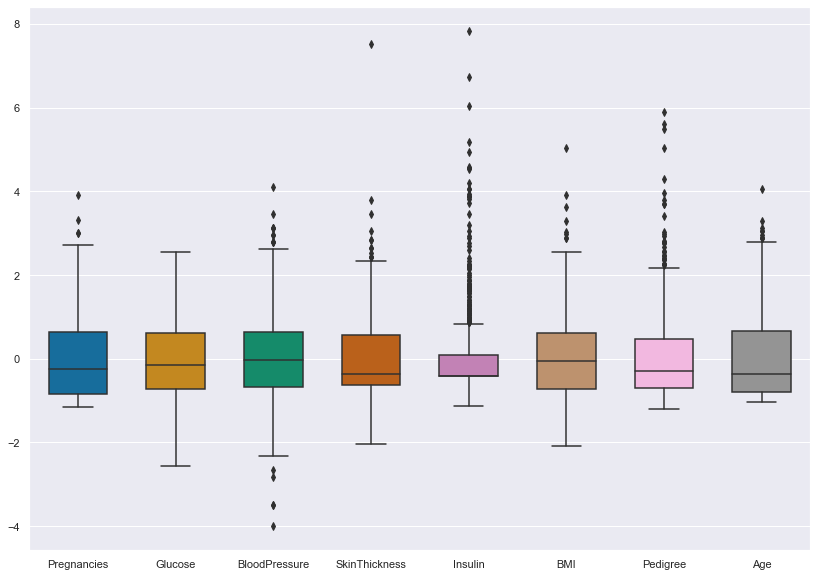

In [38]:
sns.set(rc={'figure.figsize': (14, 10)})
sns.boxplot(data=std_scaled, width=0.6, palette="colorblind")

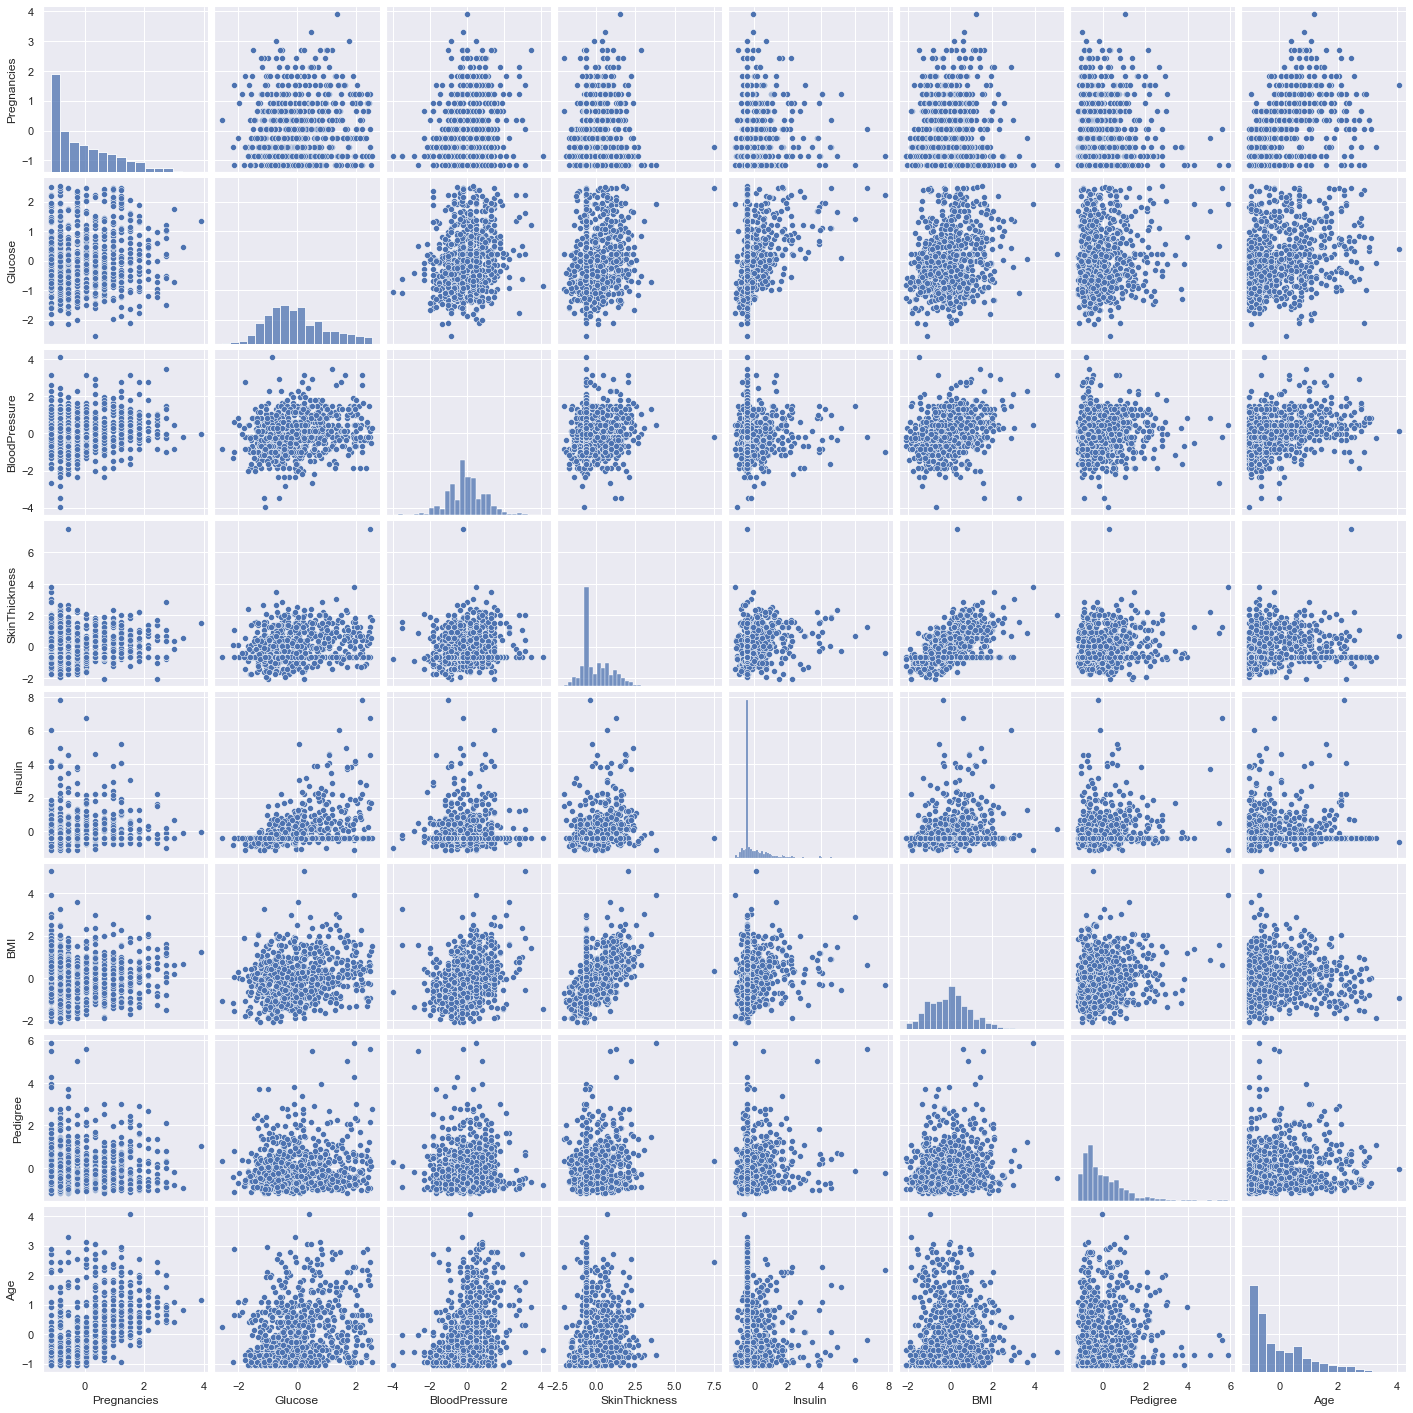

In [39]:
sns.pairplot(std_scaled)

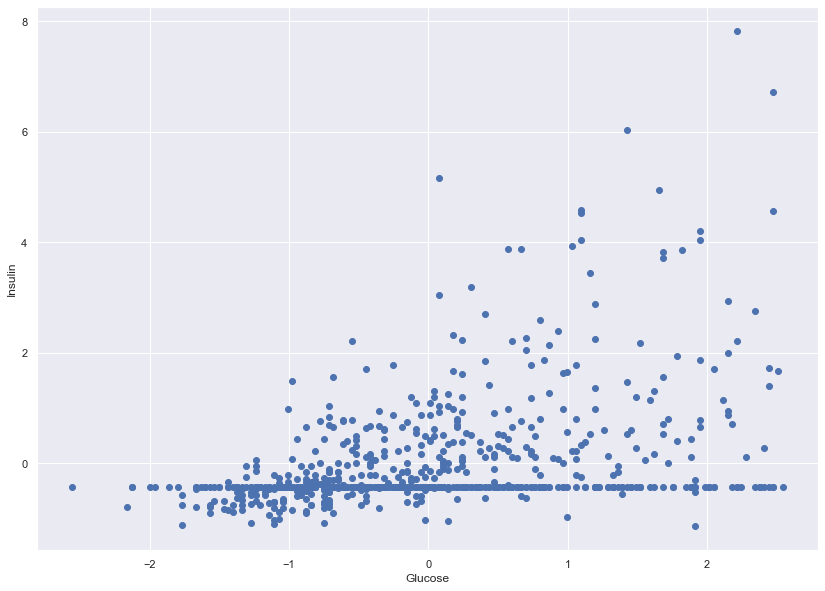

In [40]:
plt.scatter(std_scaled['Glucose'], std_scaled['Insulin'])
# plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
# plt.title('Simple Scatter plot')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

### Normalization (MinMax) 

In [41]:
test_norm = preproc.copy()

norm_scaler = MinMaxScaler()
norm_scaled = norm_scaler.fit_transform(test_norm)

norm_scaled = pd.DataFrame(data=norm_scaled, columns=test_norm.columns)
norm_scaled.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.079086  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.079086  0.171779   
2     0.470588  0.896774       0.408163       0.147135  0.079086  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   Pedigree       Age  
0  0.234415  0.483333  
1  0.116567  0.166667  
2  0.253629  0.183333  
3  0.038002  0.000000  
4  0.943638  0.200000

In [42]:
# sns.set(rc={'figure.figsize': (14, 10)})
# sns.boxplot(data=norm_scaled, width=0.6, palette="colorblind")

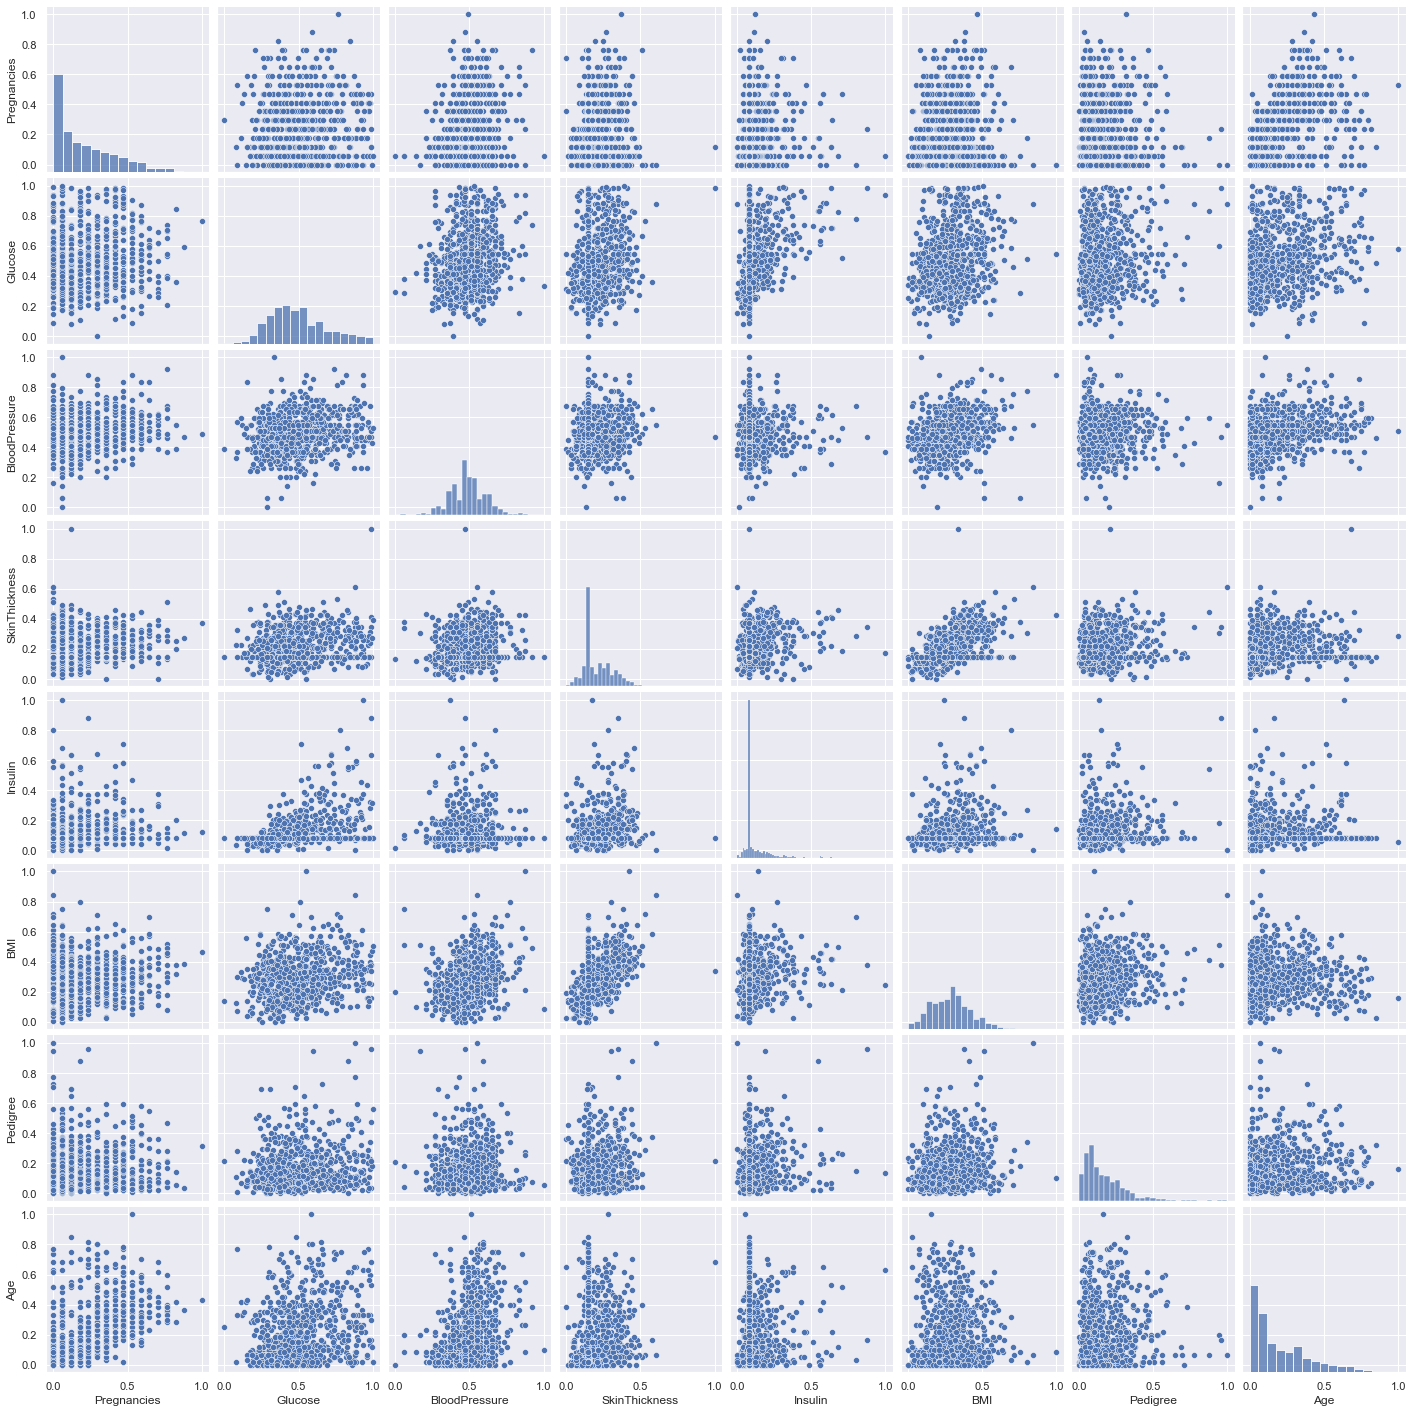

In [43]:
sns.pairplot(norm_scaled)

### Normalizer (Euclidean length of 1)

In [44]:
test_nm = preproc.copy()

nm_scaler = Normalizer()
nm_scaled = nm_scaler.fit_transform(test_nm)

nm_scaled = pd.DataFrame(data=nm_scaled, columns=test_norm.columns)
nm_scaled.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.030640  0.755788       0.367681       0.178734  0.407510  0.171584   
1     0.006991  0.594251       0.461418       0.202744  0.557893  0.185966   
2     0.037298  0.853186       0.298382       0.095745  0.372043  0.108630   
3     0.006612  0.588467       0.436392       0.152076  0.621527  0.185797   
4     0.000000  0.596386       0.174127       0.152361  0.731335  0.187622   

   Pedigree       Age  
0  0.003202  0.255334  
1  0.002454  0.216727  
2  0.003133  0.149191  
3  0.001104  0.138852  
4  0.009960  0.143655

<AxesSubplot:>

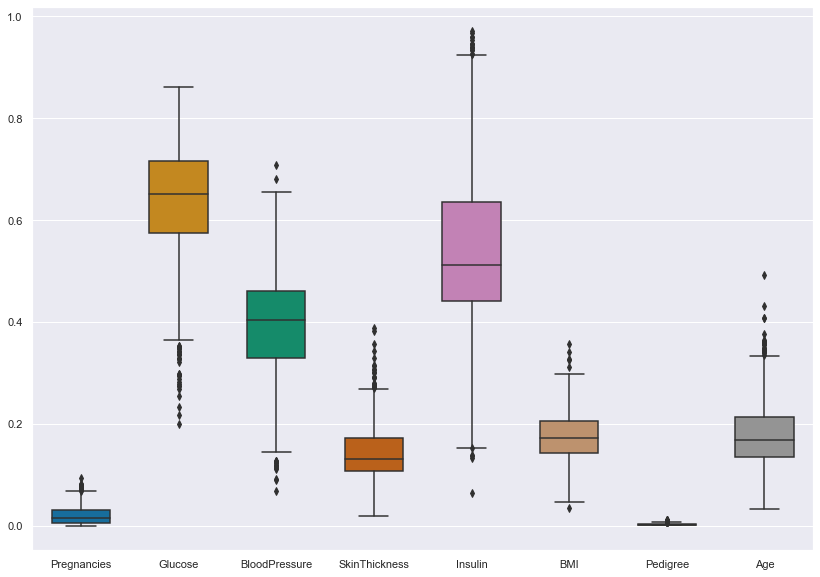

In [45]:
sns.set(rc={'figure.figsize': (14, 10)})
sns.boxplot(data=nm_scaled, width=0.6, palette="colorblind")

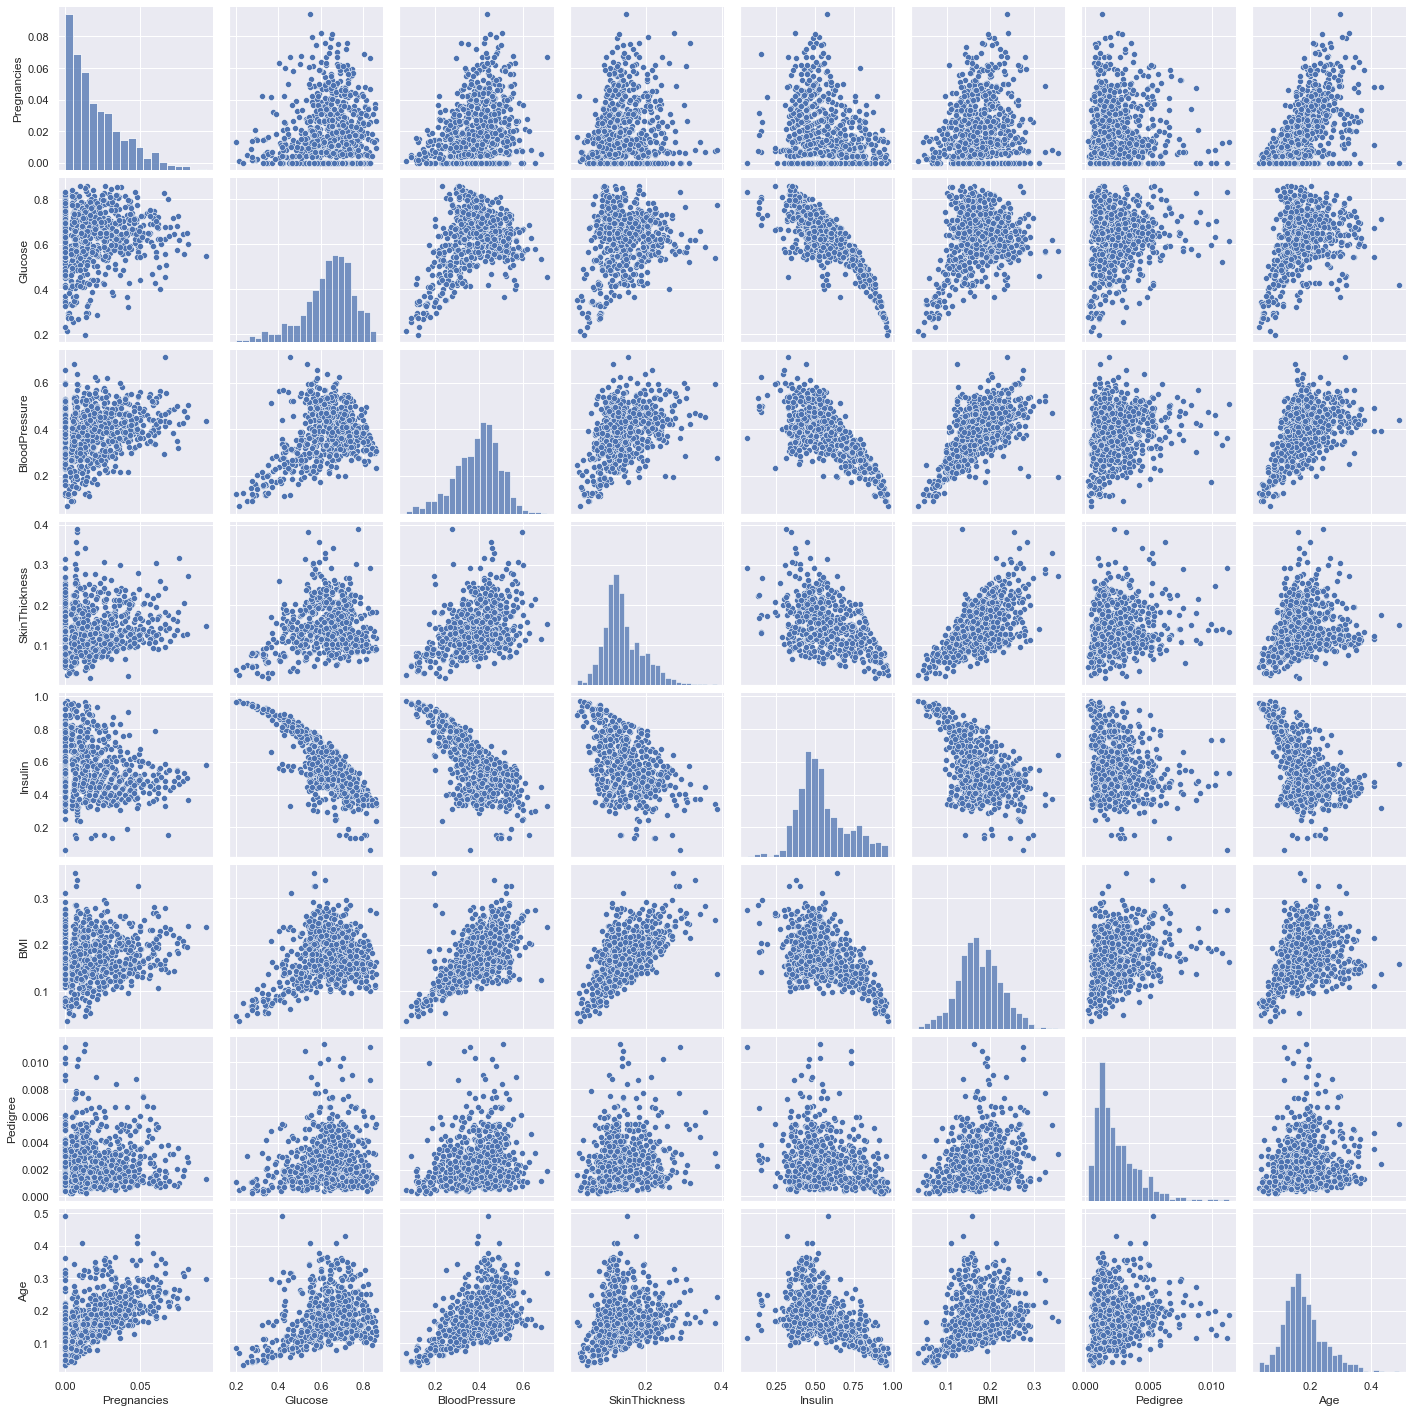

In [46]:
sns.pairplot(nm_scaled)

### Robust Scaler

In [47]:
test_rb = preproc.copy()

rb_scaler = RobustScaler()
rb_scaled = rb_scaler.fit_transform(test_rb)

rb_scaled = pd.DataFrame(data=rb_scaled, columns=test_norm.columns)
rb_scaled.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0          0.6  0.765432          0.000       1.046797  0.000000  0.175824   
1         -0.4 -0.790123         -0.375       0.523398  0.000000 -0.593407   
2          1.0  1.629630         -0.500      -0.214902  0.000000 -0.956044   
3         -0.4 -0.691358         -0.375       0.000000  0.299270 -0.428571   
4         -0.6  0.493827         -2.000       1.046797  1.858789  1.219780   

   Pedigree       Age  
0  0.665359  1.235294  
1 -0.056209  0.117647  
2  0.783007  0.176471  
3 -0.537255 -0.470588  
4  5.007843  0.235294

<AxesSubplot:>

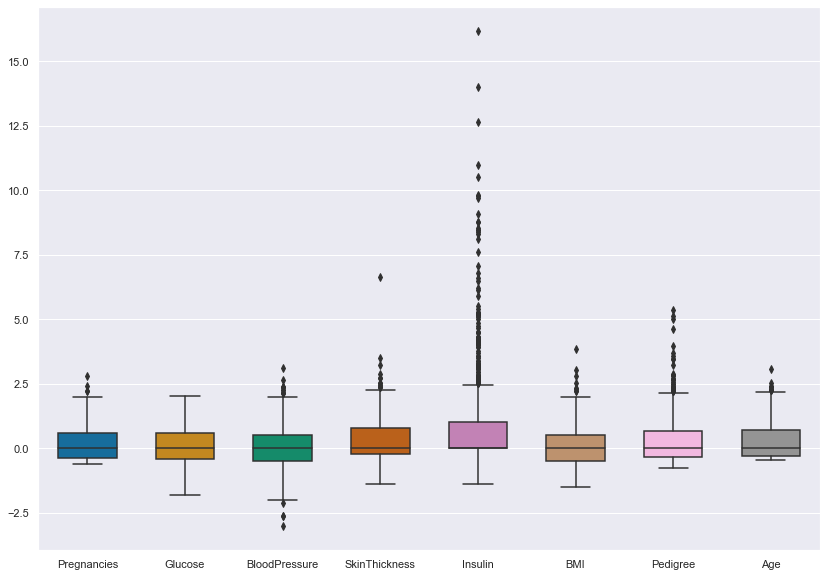

In [48]:
sns.set(rc={'figure.figsize': (14, 10)})
sns.boxplot(data=rb_scaled, width=0.6, palette="colorblind")

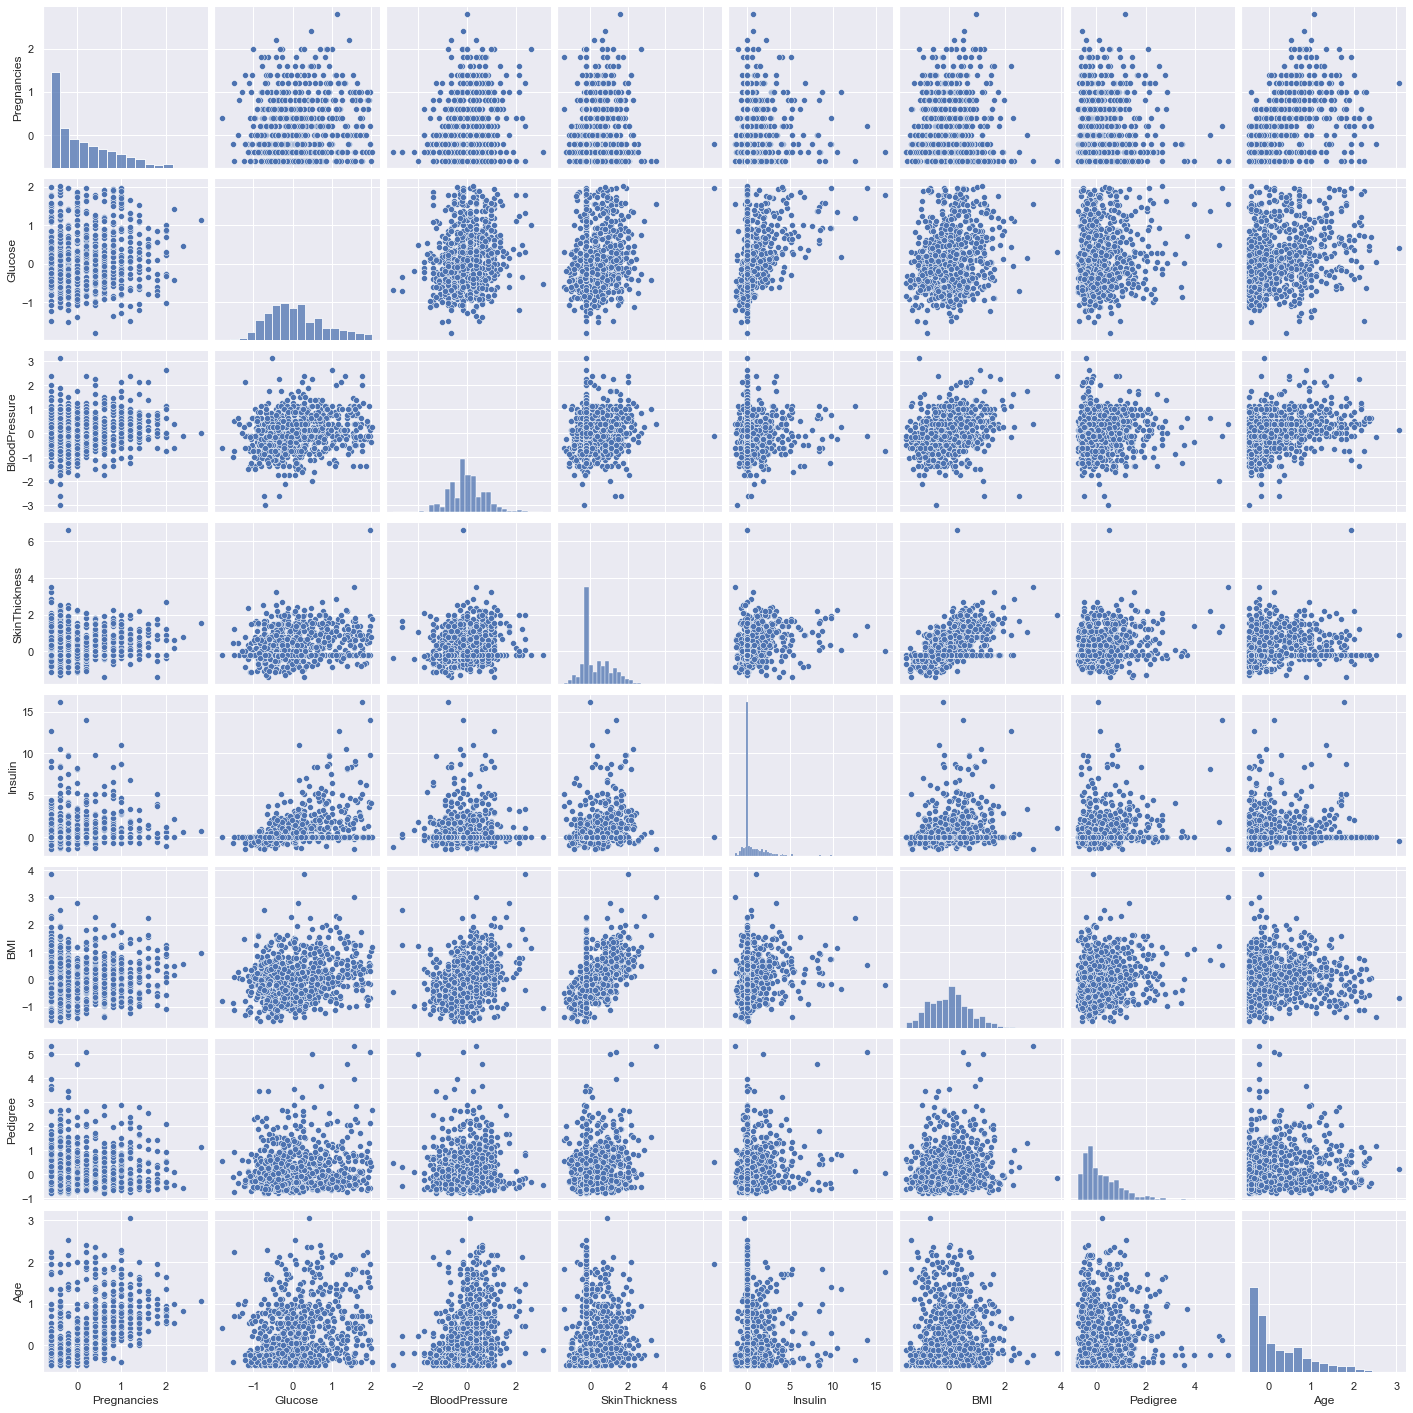

In [49]:
sns.pairplot(rb_scaled)

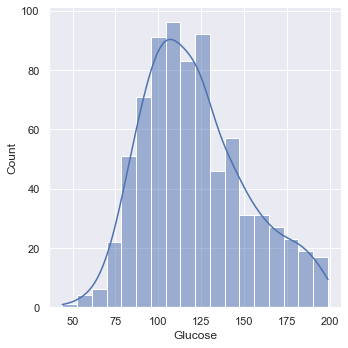

In [50]:
# Original df with imputed data

sns.displot(features_imp['Glucose'], kde=True)

Distribution of the different scaling methods

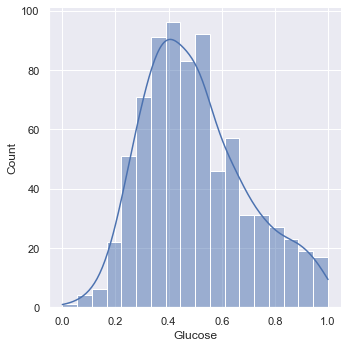

In [51]:
sns.displot(norm_scaled['Glucose'], kde=True)

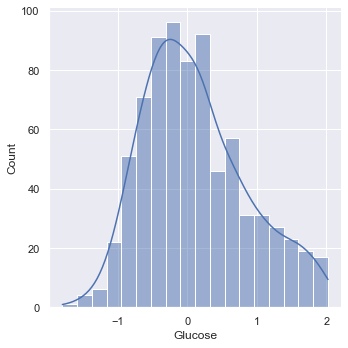

In [52]:
sns.displot(rb_scaled['Glucose'], kde=True)

In [53]:
X_dict = {'Standard': std_scaled,
        'MinMax': norm_scaled,
        'Normalizer': nm_scaled,
        'Roubust': rb_scaled
         }

In [78]:
for dataset in X_dict:
    
    X_train, X_test, y_train, y_test = train_test_split(X_dict[dataset], y, random_state=0)
    
    training_accuracy = []
    test_accuracy = []
    neighbors = range(1, 16)

    for n_neighbors in neighbors:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)#.fit(X, y)
        clf.fit(X_train, y_train)
        training_accuracy.append(round(clf.score(X_train, y_train), 3))
        test_accuracy.append(round(clf.score(X_test, y_test), 3))
        
    print(dataset, X_train.shape)
    

    print('Max accuracy:', max(test_accuracy), ',', 'n_neighbors:', test_accuracy.index(max(test_accuracy)) + 1)
    print('\n')

Standard (576, 8)
Max accuracy: 0.802 , n_neighbors: 13


MinMax (576, 8)
Max accuracy: 0.802 , n_neighbors: 9


Normalizer (576, 8)
Max accuracy: 0.719 , n_neighbors: 11


Roubust (576, 8)
Max accuracy: 0.802 , n_neighbors: 13




# Evalute MinMax with Cross-Validation

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
norm_cross_val = norm_scaled.copy()
norm_cross_val.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.079086  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.079086  0.171779   
2     0.470588  0.896774       0.408163       0.147135  0.079086  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   Pedigree       Age  
0  0.234415  0.483333  
1  0.116567  0.166667  
2  0.253629  0.183333  
3  0.038002  0.000000  
4  0.943638  0.200000

In [75]:
k_scores_means = []
scores_ks = []
k_neighbors = range(1, 16)

for k in k_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=k)#.fit(X, y)
    scores = cross_val_score(knn_clf, norm_cross_val, y, cv=5, scoring='accuracy')
    scores_ks.append((round(scores.mean(), 3), k))
    k_scores_means.append(scores.mean())
    
print('Max Accuracy:', max(scores_ks)[0], '--', 'k_neighbors:', max(scores_ks)[1])
# print(k_scores_means)
# print(scores_ks)

Max Accuracy: 0.768 -- k_neighbors: 15


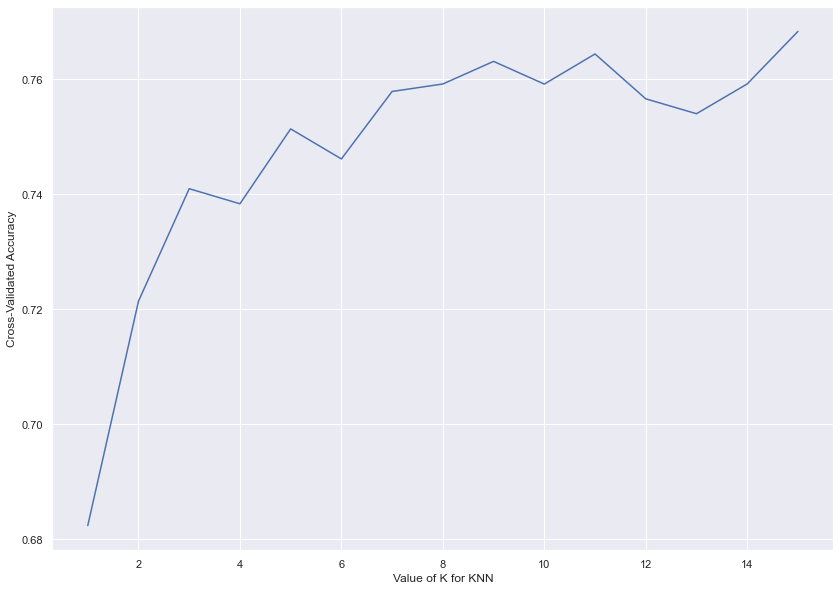

In [58]:
plt.plot(k_neighbors, k_scores_means)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()